# Zillow Project: Linear Regression

## Imports

In [1]:
# imports used in your project go here 
from wrangle import get_zillow, clean_data, wrangle_zillow
from explore import get_tax_hist, get_county_box, get_county_stat, get_tax_sqft_scatter, get_tax_sqft_stat
from preprocess import preprocess_zillow
from model import get_baseline, get_lassolars_model, get_poly_model, get_ols_model, get_poly_test

## Acquire

* Acquired from MySQL database on 2023-04-05 and saved as a csv file
* Observations: 52,441
    * Each observation is a property identified as a single family residence that had a transaction in 2017
* Features: 4
    * Each feature is a single characteristic about the property and include: 
        * Bedroom count
        * Bathroom count
        * Square feet of the property
        * Tax value amount in dollars        

In [2]:
# getting data and showing the top 5
get_zillow().head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips
0,4.0,3.5,3100.0,1023282.0,6059.0
1,2.0,1.0,1465.0,464000.0,6111.0
2,3.0,2.0,1243.0,564778.0,6059.0
3,4.0,3.0,2376.0,145143.0,6037.0
4,4.0,3.0,2962.0,773303.0,6037.0


## Prepare

* Cleaning:
    * Removed outliers
        * Lower limit: Q1 - (1.5 * IQR)
        * Upper limit: Q3 + (1.5 * IQR)
    * Drop null values
    * Removed duplicates
    * Renamed columns
* Prep:
    * Removed all half-bathroom properties
    * Split data into train, test, validate

In [3]:
train, test, validate = wrangle_zillow()

## Explore

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis
* Remember to split your data before exploring how different variables relate to one another
* Each question should be stated directly 
* Each question should be supported by a visualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

## You may use this as a template for how to ask and answer each question:

### 1) What does the distribution of proerty tax value amount look like in our train data?

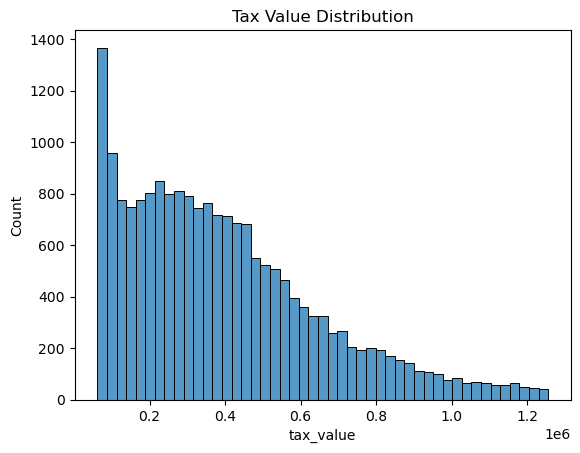

In [4]:
# gettind ditrubution of the tax values
get_tax_hist()

##### Takeaways:
* The target is appears to be normally distributed with the exceotion of the lowest amount.
* It is likely that many sub-groups of the data will have a similar ditribution
* This low tax-value rate likely represents working-class and low-income areas

###  2) Is there a difference in tax value amount for preoperties in Orange County compared to properties in Los Angeles County?

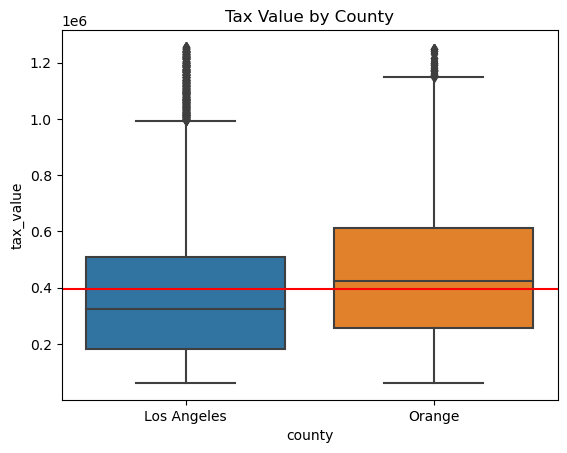

In [5]:
# getting box plots of county tax data
get_county_box()

##### Takeaways:
* Orange County properties have a higher average tax value than Los Angeles County
* Upper outliers still exists after cleaning which is likely because of the skewed-ness of the data. 
* It also may be useful to fins a more granular location feature due to the wide range of home prices in a single county

#### Hypothesis Testing:
>- Mann-whitney: SquareFeet is not normally distributed
>- H$_0$: There is no difference between the tax values of Orange County and Los Angeles.
>- H$_a$: There is a difference between the tax values of Orange County and Los Angeles.
>- Confidence Interval: 95%
>- $a$: 0.05

In [6]:
# getting hypothesis test supporting statistic
get_county_stat()


    Mann-Whitney: 26441917.0
    p-value: 2.41114243993854e-73
    


##### Takeaways:
* The p-vlaue is less than $a$, we can refec the null hypothesis
* There is a differnce between the tax values of Orange County and Los Angeles

##### Actions:
* Examine the data separated by county

### 3) What is the relationship between tax value and square feet in Orange County? Los Angeles County?

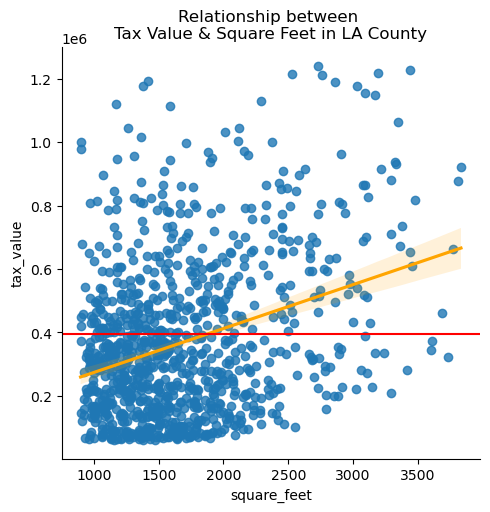

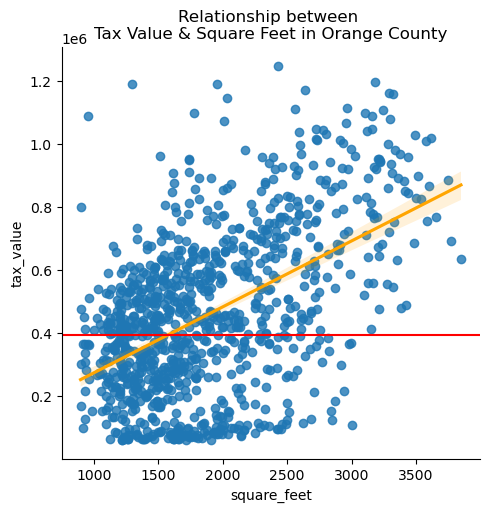

In [7]:
# getting scatter plot
get_tax_sqft_scatter()

#### Takeaways:
* Both appear to have a positive linear correlation with orange county having a stronger relationship. We will use statistical test to verify

#### Hypothesis Testing LA:
>- Spearman-r: SquareFeet is not normally distributed
>- H$_0$: There is no linear relationship between square feet and tax value for properties in LA.
>- H$_a$: There is a linear relationship between square feet and tax value for properties in LA.
>- Confidence Interval: 95%
>- $a$: 0.05

#### Hypothesis Testing OC:
>- Spearman-r: SquareFeet is not normally distributed
>- H$_0$: There is no linear relationship between square feet and tax value for properties in OC.
>- H$_a$: There is a linear relationship between square feet and tax value for properties in OC.
>- Confidence Interval: 95%
>- $a$: 0.05

In [8]:
# getting spearman r for both LA county and OC
get_tax_sqft_stat()

Los Angeles County
    Spearman r: 0.3027484197443469
    p-value: 0.0
    
Orange County
    Spearman r: 0.39908013105494444
    p-value: 9.816246014205157e-166
    


##### Takeaways:
* The null hypothesis can be rejected for both due to both p-values being below $a$.
* Both Orange County and Los Angeles County properties' square feet have a linear relationship with their tax value.
* I will only focus on OC in modeling because there is a greater correlation out of the two and becasue of time

## Exploration Summary
* Our tax value is not normally ditributed
* There is a difference in the tax value of properties in Orange County and Los Angeles County
* There is a stonger correlation between square feet and tax value for homes in Orange County than Los Angeles County proerties

**Modeling**
* Square Feet
* Bedrooms
* Bathrooms
* Only Orange County properties

## Modeling

In [9]:
# scaling data
X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = preprocess_zillow()

### Introduction
* The models will be evaluated using the RMSE for its readability and ability to reduce the impact of outliers
* Due to the limited number of features used in modeling, success for this stage is a model perfroming better than the baseline
* The baseline was calculated by taking the mean of the tax value

In [10]:
# getting baseline and baselin eval
get_baseline()

Baseline Model
    Baseline: 451120.36
    RMSE on Train: 259532.84
    RMSE on Validate: 255477.65
    RMSE Difference: 4055.19


### Top Models

In [11]:
# getting LassoLars model
get_lassolars_model()

LassoLars Alpha-1 Model
    RMSE on Train: 226149.9063
    RMSE on Validate: 227244.7269
    RMSE Difference: -1094.8206


In [12]:
# getting polynomial model
get_poly_model()

Polynomial 2-degree Model
    RMSE on Train: 224173.5278
    RMSE on Validate: 225427.9259
    RMSE Difference: -1254.3982


In [13]:
# getting ols model
get_ols_model()

OLS Model
    RMSE on Train: 226149.8616
    RMSE on Validate: 227253.9366
    RMSE Difference: -1104.075


### Best Model
* The polynomial regression model will be selected due to its lower RMSE. 
* While the other models are more precise, the RMSE on validate is still lower for the polynomial model regardless of the gap in RMSE difference.

In [14]:
# getting poly model run on test
get_poly_test()

Polynomial 2-degree Model
    RMSE on Train: 224173.5278
    RMSE on Test: 226917.6663
    RMSE Difference: -2744.1385


### Modeling Wrap 
* The polynomial model performed better than the baseline
* I would not recommend the use of this model in production, but as a starting point for more refined and precise modeling. 

## Conclusion

### Summary

* Our tax value is not normally ditributed
* There is a difference in the tax value of properties in Orange County and Los Angeles County
* There is a stonger correlation between square feet and tax value for homes in Orange County than Los Angeles County proerties
* Drivers discovered did lead to the success of performing better than the baseline

### Recommendations
* Find data that represents smaller geographic areas for each property, such as zip codes, due to the wide range of tax values in a single county
* Extend the life of this project to increase time for feature selection and featuren engineering

### Next Steps
* Model for homes in Los Angeles County
* Explore the outliers that still exist after accounting for outliers in the cleaning phase
* Explore and model based on half-bathroom features
* Add more features from the database and explaore/engineer the features for more precise modeling